Importing the libraries

In [2]:
%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data = pd.read_csv("insurance.csv")

In [4]:
# show the first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# show the last 5 rows
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# show the num of rows and columns
data.shape

(1338, 7)

In [7]:
# show the statistical information
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# show more information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [9]:
# show if is null data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-12-35f80441dffe>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


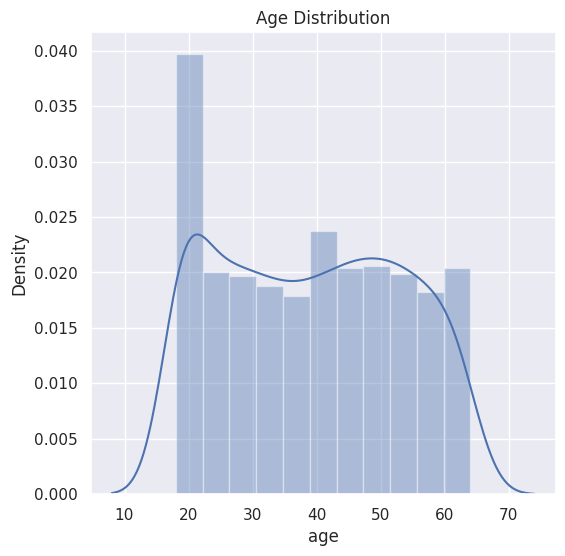

In [12]:
# plot the distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

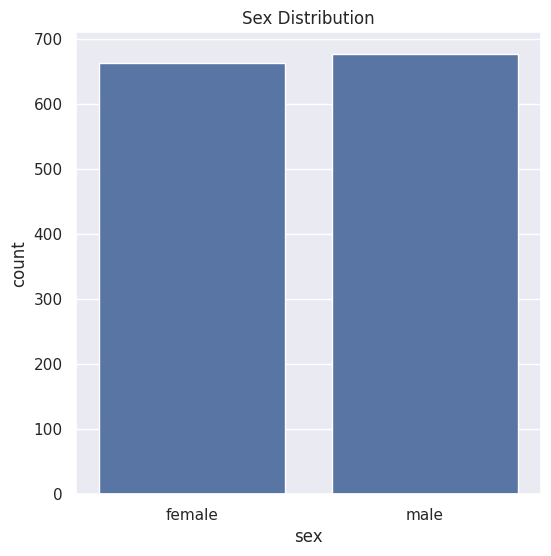

In [16]:
# plot the sex
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title('Sex Distribution')
plt.show()

In [17]:
# print the number of sex
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-18-a6aedade23d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


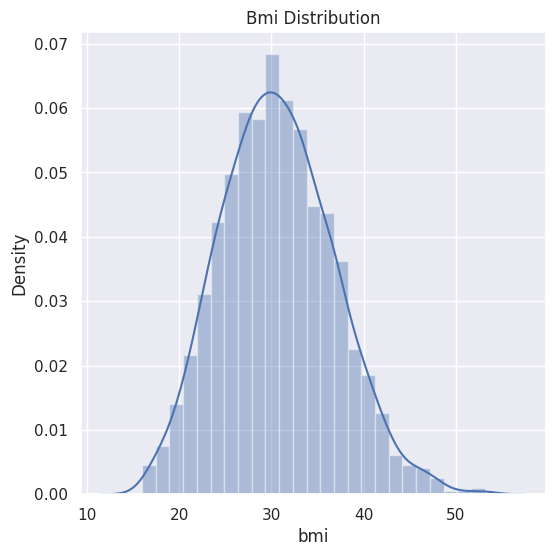

In [18]:
# plot the distribution of bmi 
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('Bmi Distribution')
plt.show()

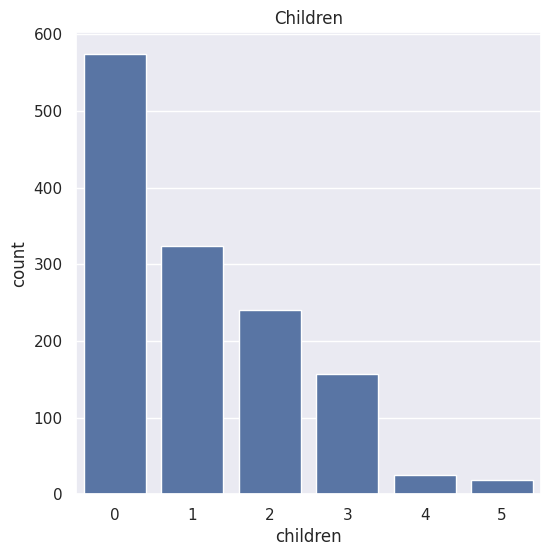

In [19]:
# plot the children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

In [20]:
# print the number of children
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

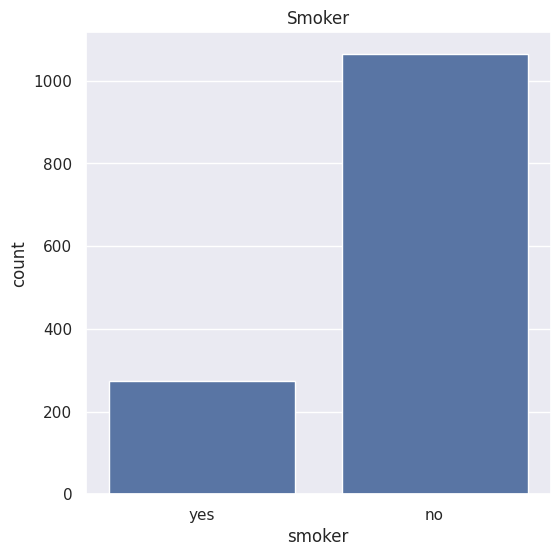

In [22]:
# plot the smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title('Smoker')
plt.show()

In [23]:
# print the number of smoker
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

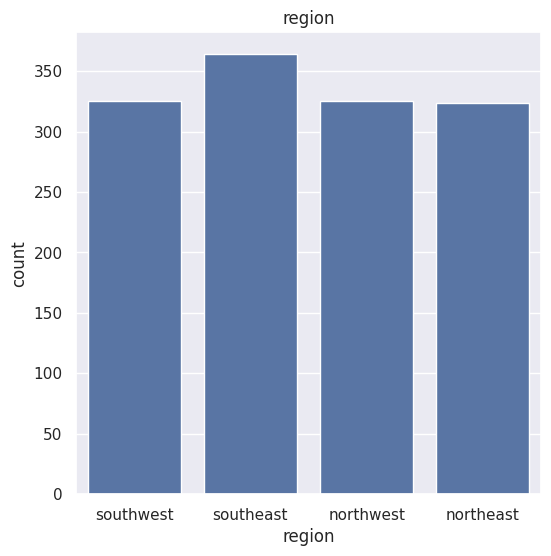

In [25]:
# plot the region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

In [26]:
# print the number of region
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-27-09c712cbb2da>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


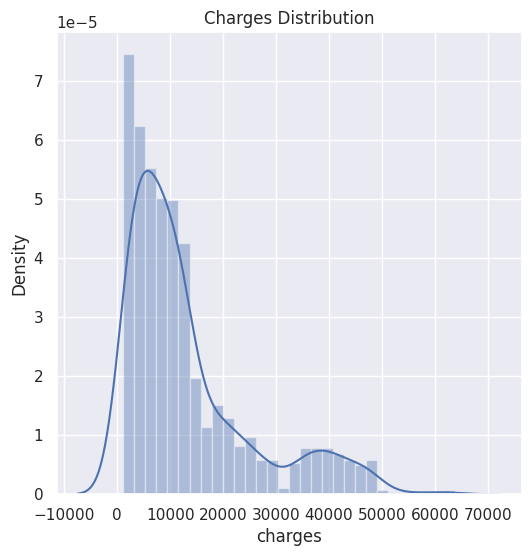

In [27]:
# plot the distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

In [33]:
# encoding the labels
data.replace({'sex':{'male':0,'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

<ipython-input-33-7d42446c1f48>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1}}, inplace=True)
<ipython-input-33-7d42446c1f48>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
<ipython-input-33-7d42446c1f48>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd

Splitting the data

In [34]:
X = data.drop(["charges"],axis=1)
Y = data['charges']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
train_predict = model.predict(X_train)
r2 = metrics.r2_score(Y_train, train_predict)
r2

0.751505643411174

In [40]:
test_predict = model.predict(X_test)
r2 = metrics.r2_score(Y_test, test_predict)
r2

0.7447273869684077

Building a predictive system

In [41]:
input = (31,1,25.74,0,1,0)
arr_input = np.asarray(input)
reshaped_inout = arr_input.reshape(1,-1)
prediction = model.predict(reshaped_inout)
print("prediction is :",prediction)

/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


prediction is : [3760.0805765]
